[nltk_data] Downloading package punkt to /Users/doctordu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/doctordu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


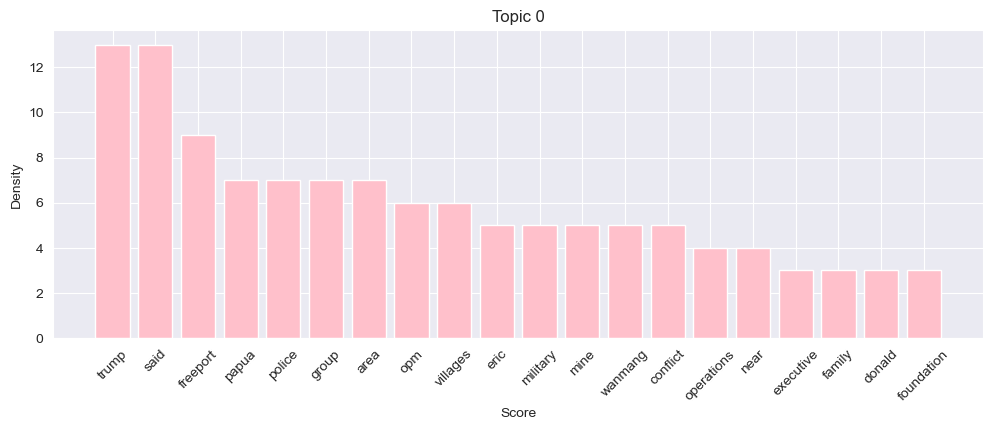

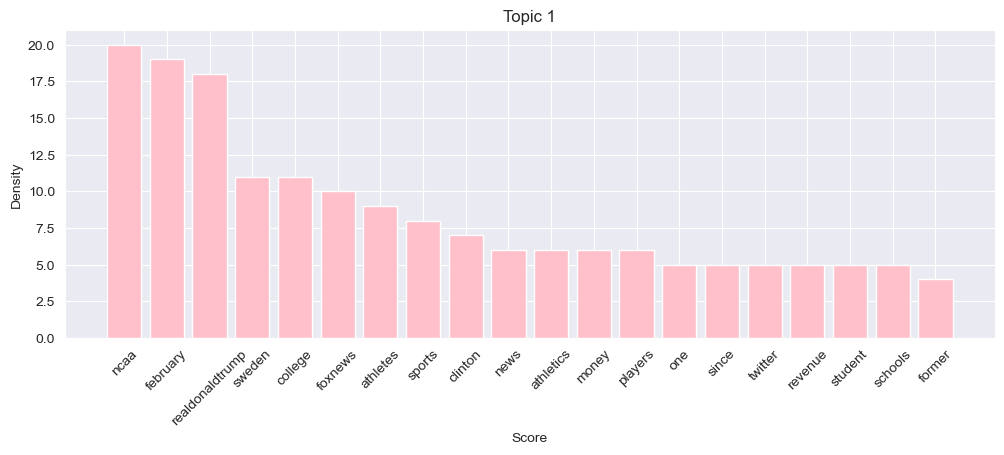

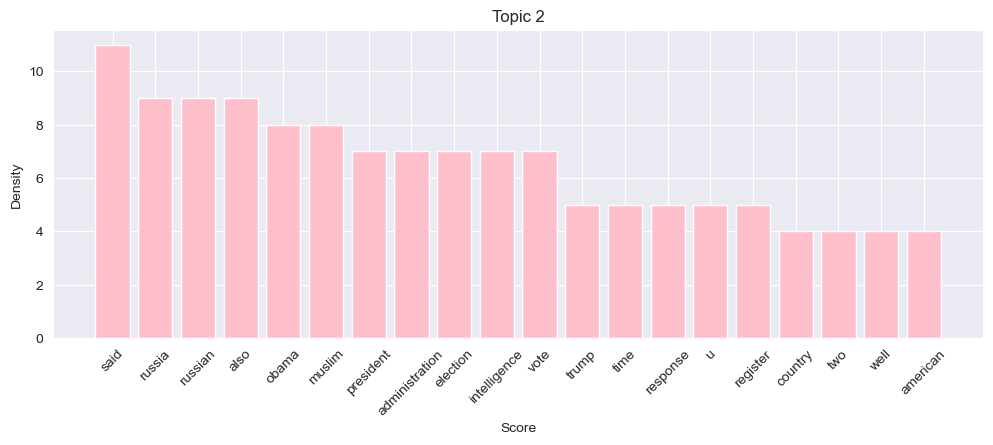

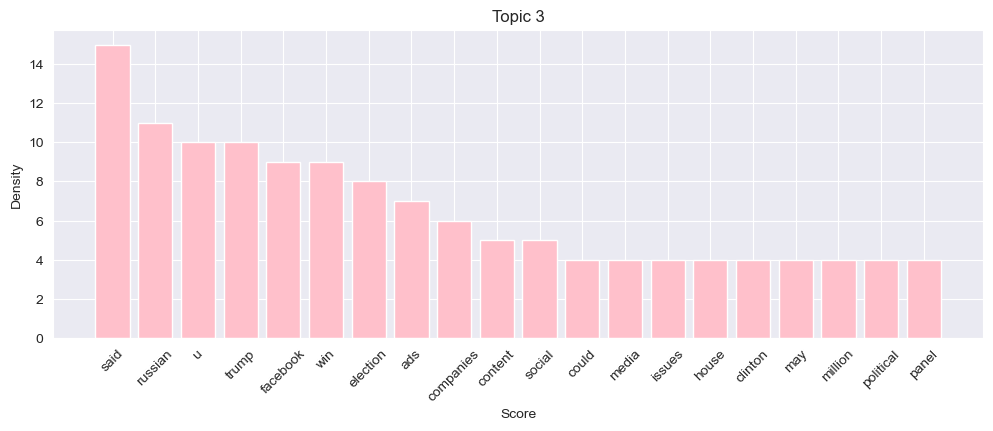

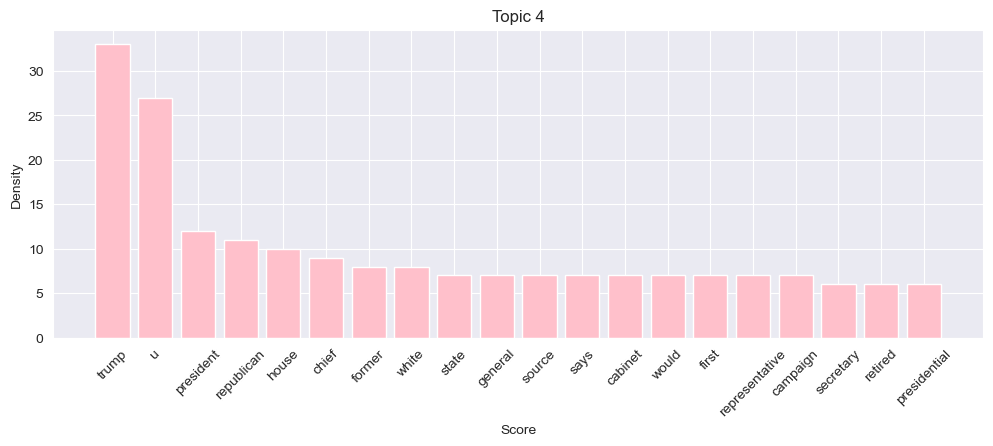

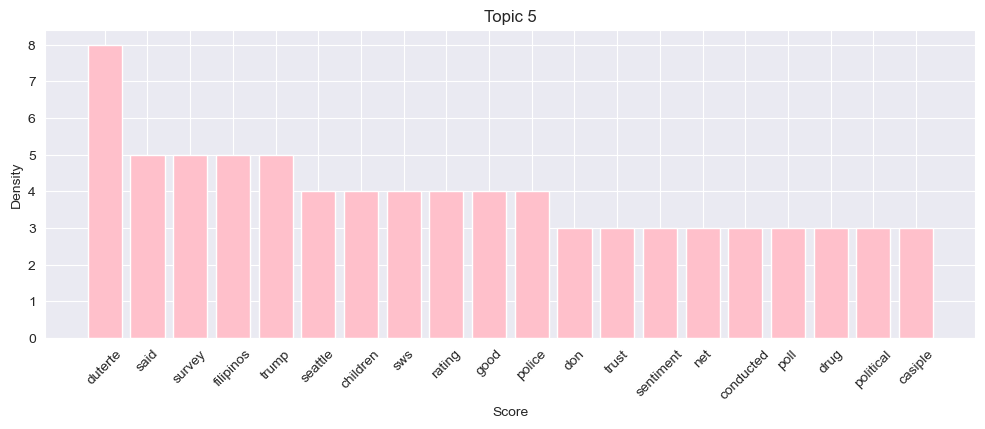

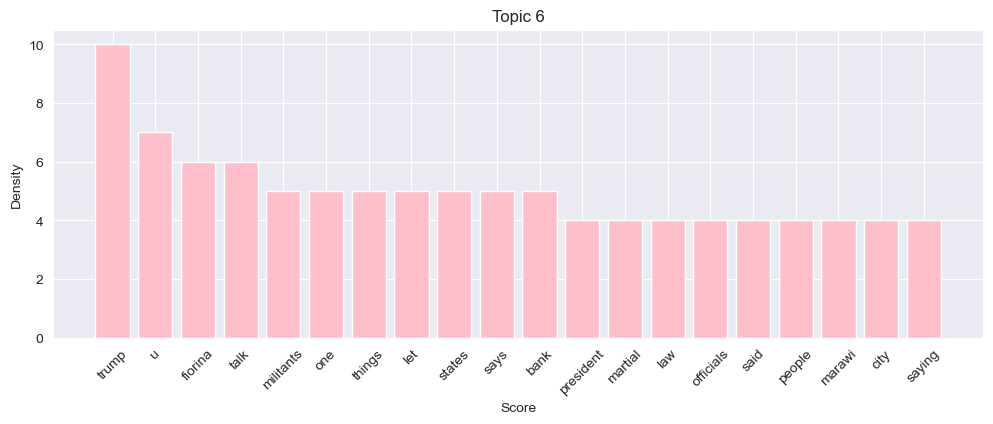

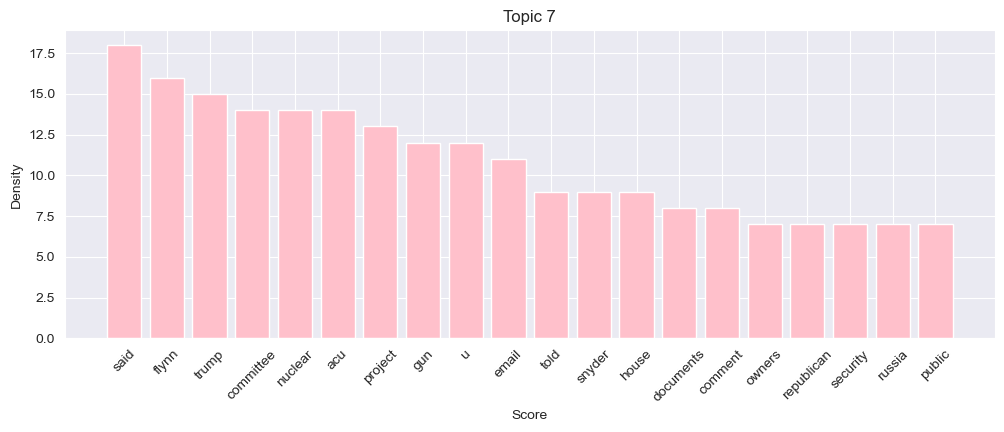

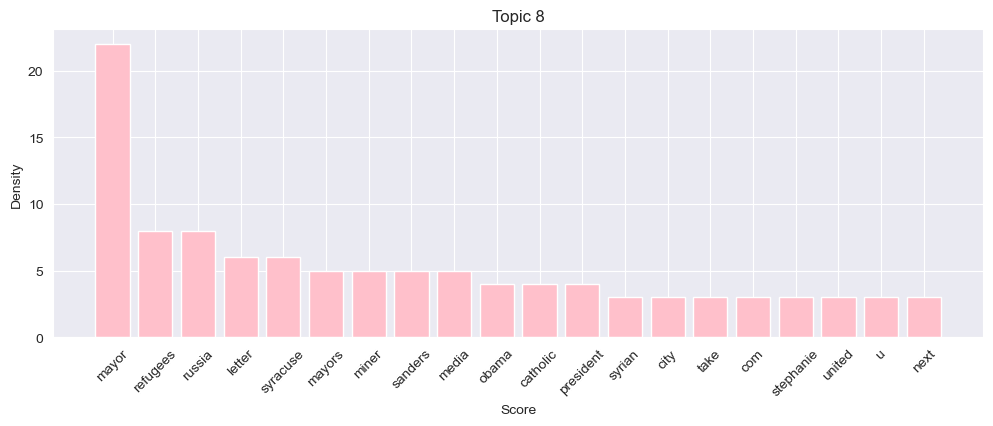

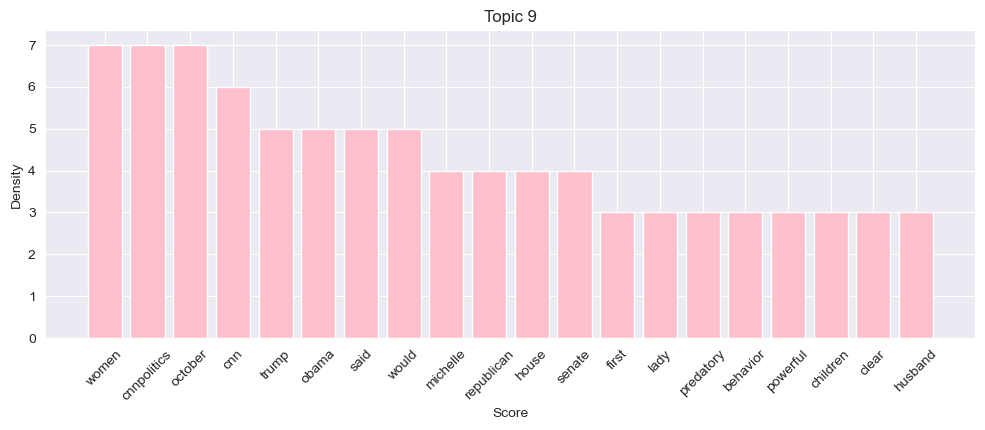

In [53]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import numpy as np
import pandas as pd
from os.path import join as opj
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

nltk.download('punkt')
nltk.download('stopwords')

def get_word_frequencies(text):
    words = word_tokenize(text)
    word_freq = Counter(words)
    return word_freq

# data folder
folder_dir = opj('/', 'Users', 'doctordu', 'Documents', 'Github', 'Neuromatch_NLP', 'dataset')

# load labels 
arr_labels_train = np.load(opj(folder_dir, 'train_labels.npy'))
arr_labels_test = np.load(opj(folder_dir, 'test_labels.npy'))
arr_labels_val = np.load(opj(folder_dir, 'validation_labels.npy'))

# load  article text
df_train = pd.read_csv(opj(folder_dir, 'train_df.csv'))
df_test = pd.read_csv(opj(folder_dir, 'test_df.csv'))
df_val = pd.read_csv(opj(folder_dir, 'validation_df.csv'))
arr_text_train = df_train['text']
arr_text_test = df_test['text']
arr_text_val = df_val['text']
arr_text = pd.concat([arr_text_train, arr_text_test, arr_text_val], axis=0).astype(str)

# load topics
arr_topics_train = np.load(opj(folder_dir, 'topic_distributions_train.npy'))
arr_topics_test = np.load(opj(folder_dir, 'topic_distributions_test.npy'))
arr_topics_val = np.load(opj(folder_dir, 'topic_distributions_validation.npy'))
arr_topics = np.vstack((arr_topics_train, arr_topics_test, arr_topics_val))

# find max scores
topic = np.argmax(arr_topics, axis=1)
noTopics = np.amax(topic)
topic = pd.DataFrame(topic)

for nTopic in range(10):
    isTopic = topic[0] == nTopic
    text =  arr_text[nTopic].str.cat(sep=' ')
    word_frequencies = get_word_frequencies(text)
    word_frequencies = word_frequencies.most_common(20)
    labels = [item[0] for item in word_frequencies]
    values = [item[1] for item in word_frequencies]
    plt.figure(figsize=(12, 4))
    plt.bar(labels, values, color='pink')  
    plt.xlabel('Score')
    plt.ylabel('Density') 
    plt.title(f"Topic {nTopic}")
    plt.xticks(rotation=45)
    plt.show()

